In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/multi-class-GAN/data/credit-score.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_e=LabelEncoder()
data['Credit_Score']=label_e.fit_transform(data['Credit_Score'])
data['Credit_Mix']=label_e.fit_transform(data['Credit_Mix'])
data['Payment_Behaviour']=label_e.fit_transform(data['Payment_Behaviour'])
data['Payment_of_Min_Amount']=label_e.fit_transform(data['Payment_of_Min_Amount'])

df_numerical_features = data.select_dtypes(exclude='object')
df_categorical_features = data.select_dtypes(include='object')

num_cols = list(df_numerical_features)
cat_cols = list(df_categorical_features)

majority_number=data[data['Credit_Score'] == 2].shape[0] #standard class

poor_n=data[data['Credit_Score'] == 1].shape[0] #poor class
good_n=data[data['Credit_Score'] == 0].shape[0] #good class

data_gen_poor=data[data['Credit_Score']==1]
data_gen_good=data[data['Credit_Score']==0]

samples_to_generate_poor=majority_number-poor_n
samples_to_generate_good=majority_number-good_n

In [ ]:
sns.pairplot(data,hue='Credit_Score')

Error in callback <function flush_figures at 0x7e6813389090> (for post_execute):


KeyboardInterrupt: 

In [ ]:
!pip install ydata-synthetic==1.1.0

ERROR: Operation cancelled by user


In [ ]:
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
#Defining the training parameters
noise_dim = 128
dim = 128
batch_size = 500

log_step = 100
epochs = 100
learning_rate = [5e-4, 3e-3]
beta_1 = 0.5
beta_2 = 0.9
models_dir = '../cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synth = RegularSynthesizer(modelname='wgangp', model_parameters=gan_args, n_critic=2)
synth.fit(data_gen_poor, train_args, num_cols, cat_cols)

synth.save('generate_poor.pkl')

ModuleNotFoundError: No module named 'ydata_synthetic'

In [ ]:
synth = RegularSynthesizer.load('generate_poor.pkl')
synth_data = synth.sample(samples_to_generate_poor)

In [ ]:
noise_dim = 128
dim = 128
batch_size = 500

log_step = 100
epochs = 100
learning_rate = [5e-4, 3e-3]
beta_1 = 0.5
beta_2 = 0.9
models_dir = '../cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synth = RegularSynthesizer(modelname='wgangp', model_parameters=gan_args, n_critic=2)
synth.fit(data_gen_good, train_args, num_cols, cat_cols)

synth.save('generate_good.pkl')

In [ ]:
synth = RegularSynthesizer.load('generate_good.pkl')
synth_data_good = synth.sample(samples_to_generate_good)

In [ ]:
syn_data_concat=pd.concat([synth_data,synth_data_good])
syn_data_concat.to_csv('syn_data_concat_wgangp.csv')

In [ ]:
data_concat=pd.concat([data,synth_data,synth_data_good])
data_concat.to_csv('credit-score-1-wgangp(2).csv',index=False)

In [2]:
data_concat=pd.read_csv('/content/drive/MyDrive/multi-class-GAN/data/credit-score-1-wgangp(2).csv')

<ipython-input-6-627d7a0cd964>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color="green", label="real", ax=axs[i])
<ipython-input-6-627d7a0cd964>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_concat[col], shade=True, color="red", label="synthetic", ax=axs[i])
<ipython-input-6-627d7a0cd964>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color="green", label="real", ax=axs[i])
<ipython-input-6-627d7a0cd964>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


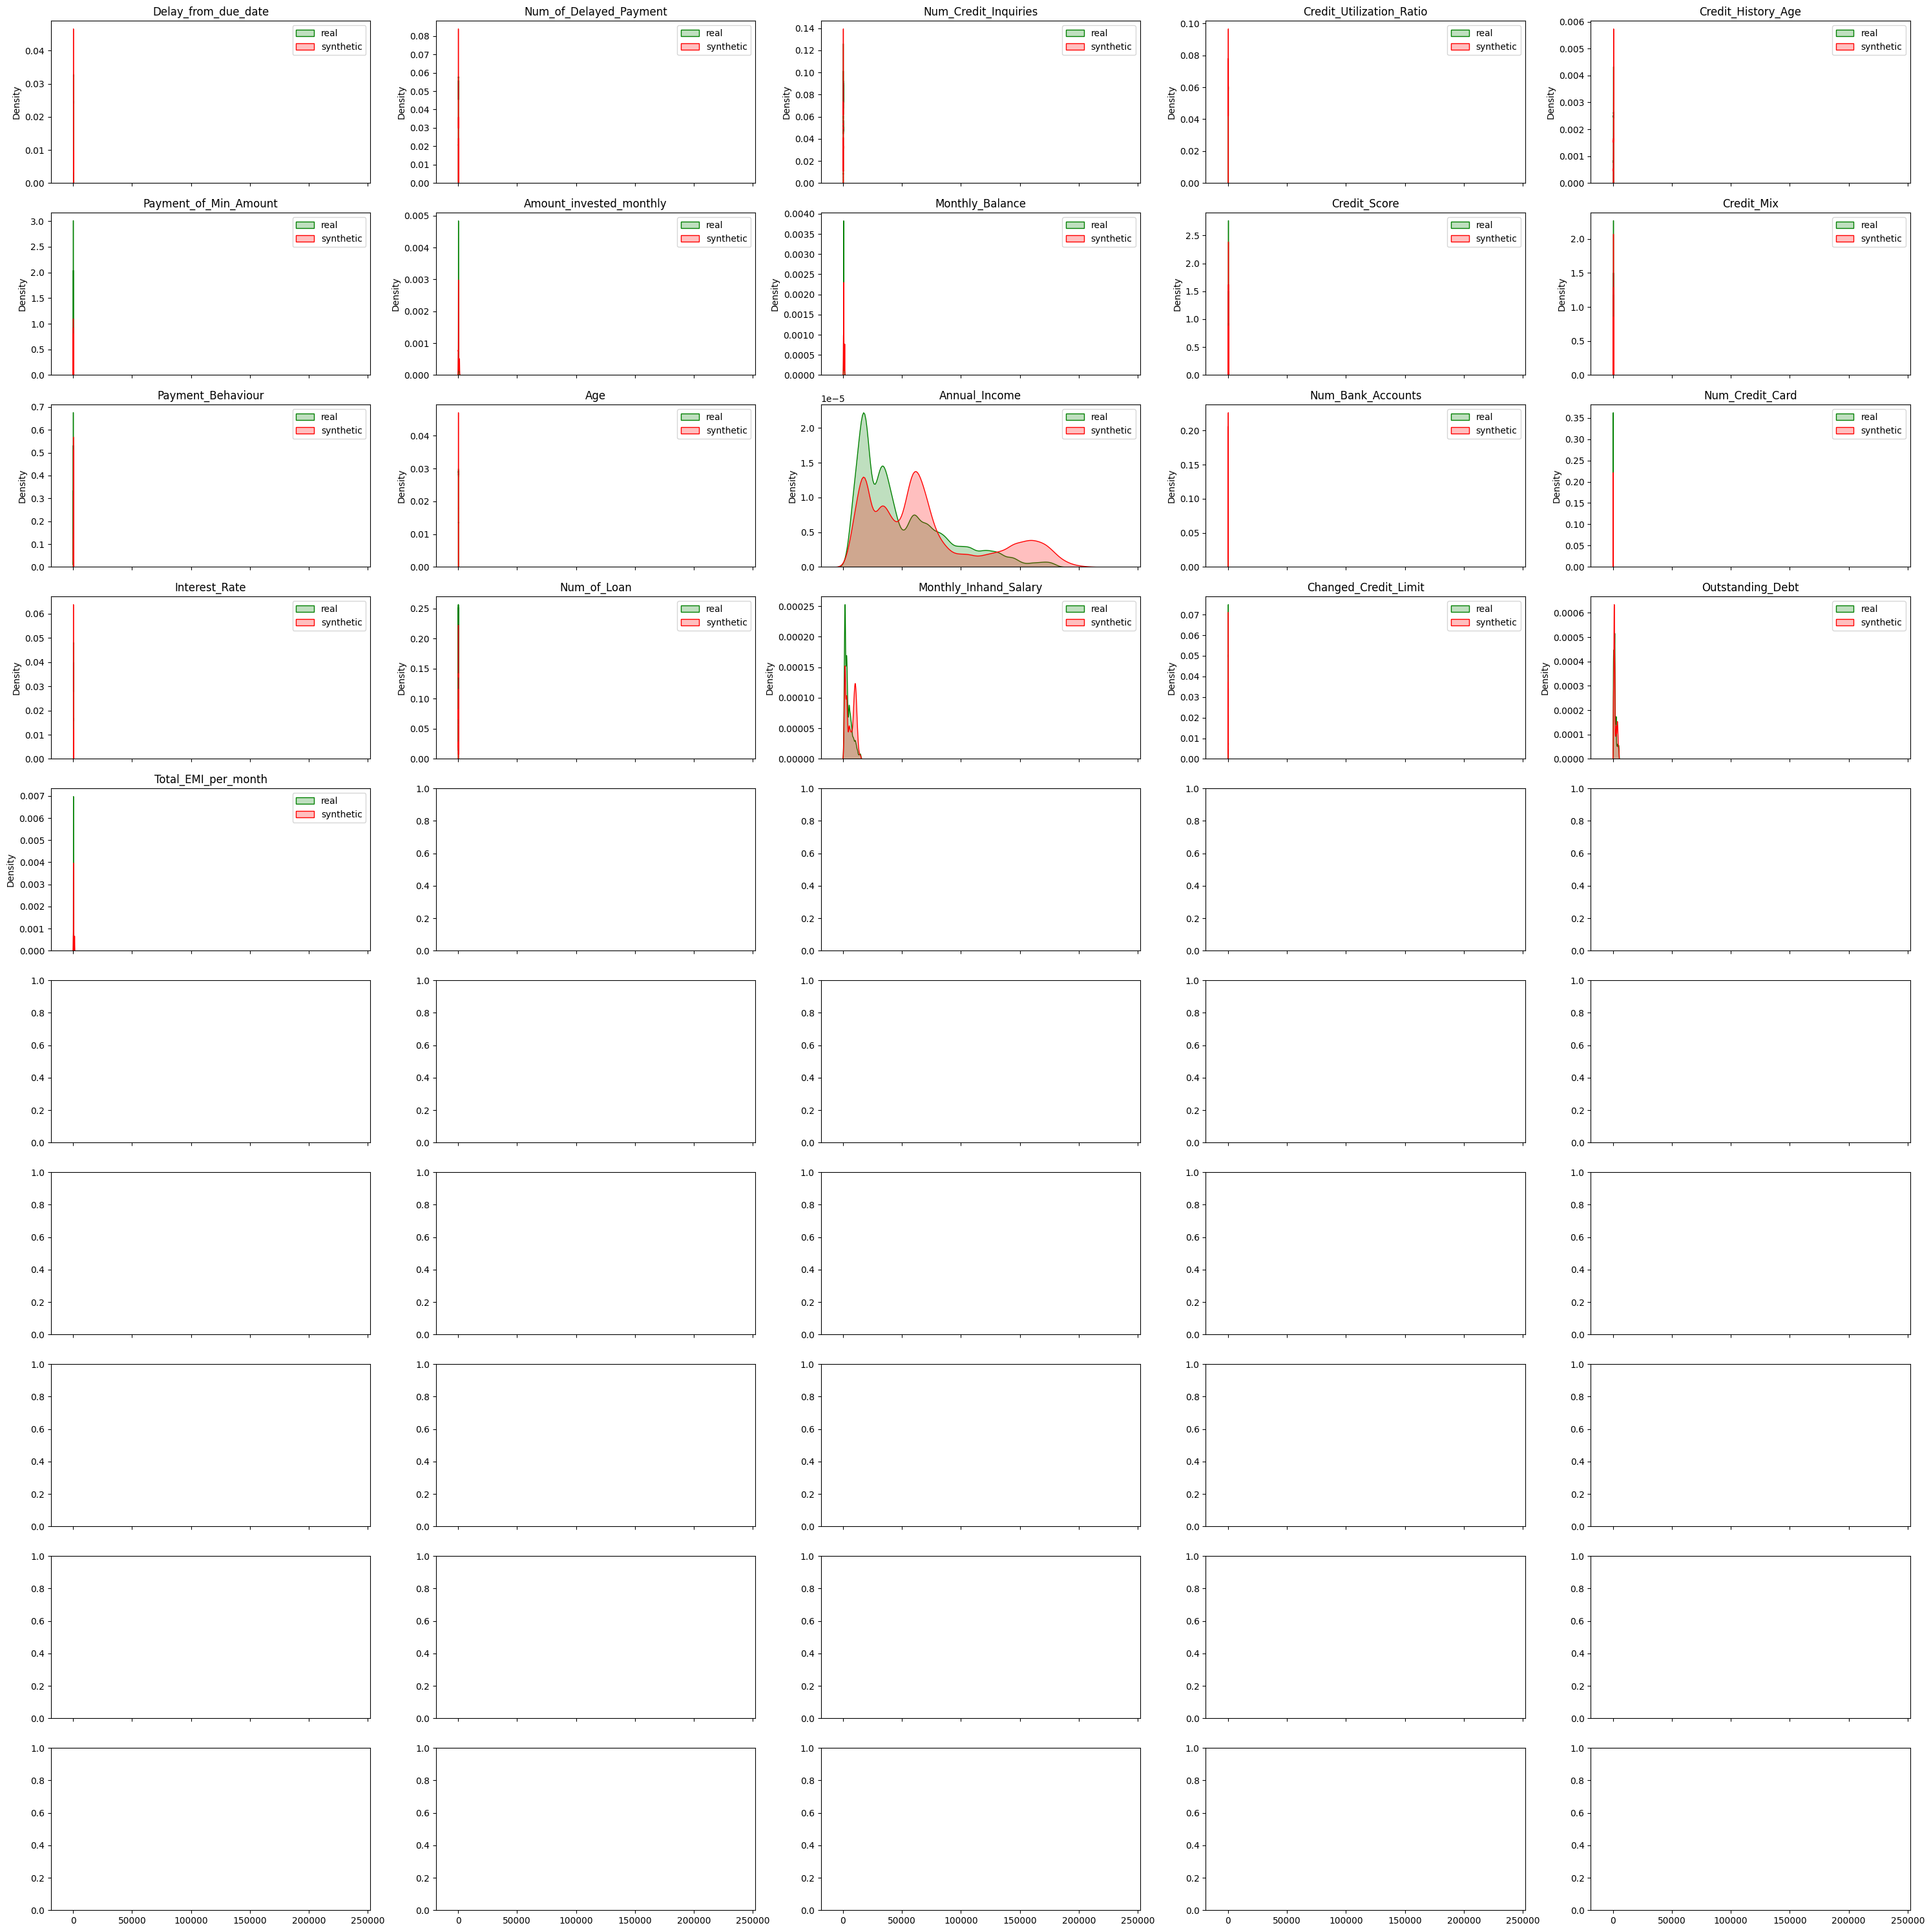

In [ ]:
for col in data.columns:
    sns.kdeplot(data[col], shade=True, color="green", label="real")
    sns.kdeplot(data_concat[col], shade=True, color="red", label="synthetic")
    # Adding labels and a legend
    plt.title(f'{col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

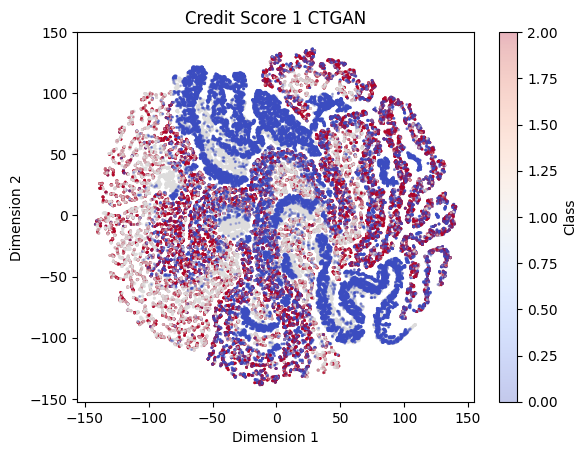

In [ ]:
features = data_concat.drop(['Credit_Score'], axis=1)
labels = data_concat['Credit_Score']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Credit Score 1 CTGAN')
plt.colorbar(label='Class')
plt.show()

In [3]:
X=data_concat.drop(['Credit_Score'],axis=1)
y=data_concat['Credit_Score']

In [4]:
#SHAP

!pip install shap

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = xgb_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:15:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 84.33%

Classification Report:
              precision    recall  f1-score   support

           0      0.865     0.958     0.909     23553
           1      0.773     0.734     0.753      8617
           2      0.843     0.732     0.784     15818

    accuracy                          0.843     47988
   macro avg      0.827     0.808     0.815     47988
weighted avg      0.841     0.843     0.840     47988



In [ ]:
# Fits the explainer
import shap
explainer = shap.Explainer(xgb_model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 47989it [6:34:29,  2.03it/s]


Waterfall plot for instance 0, output 0


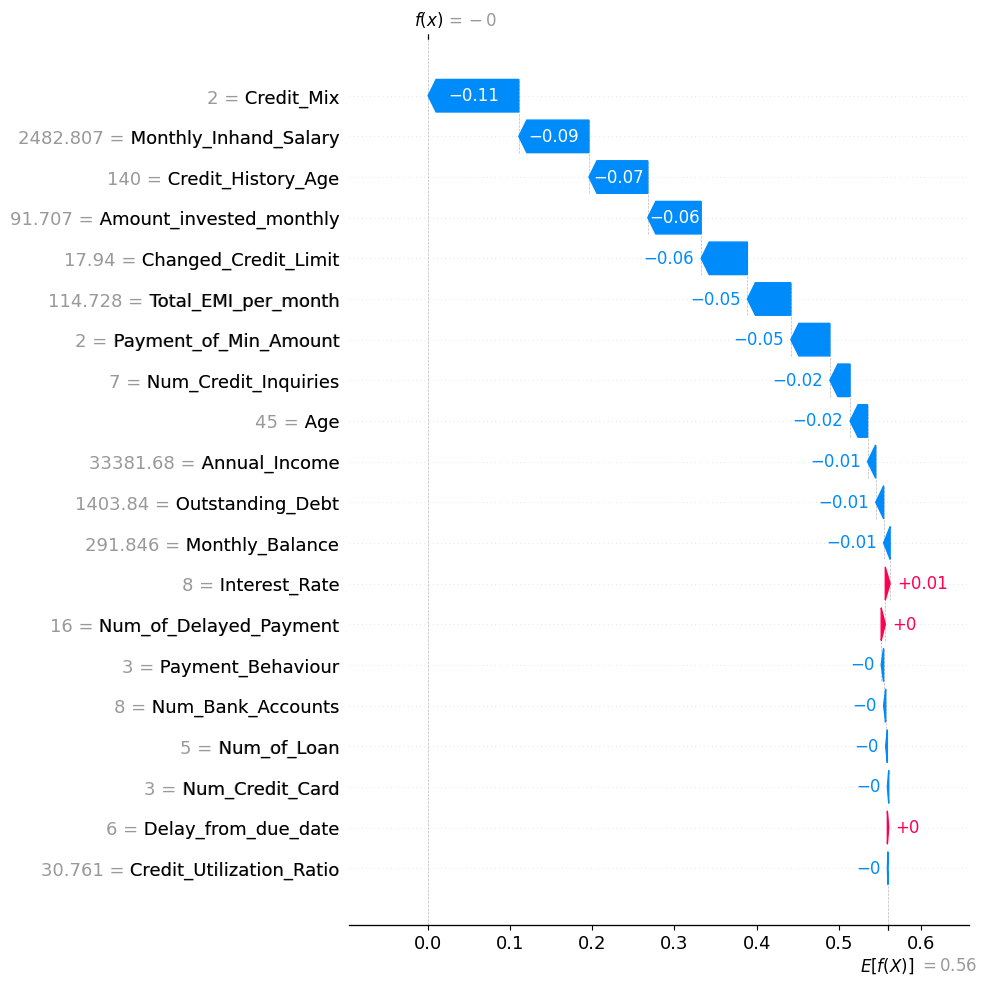

Waterfall plot for instance 0, output 1


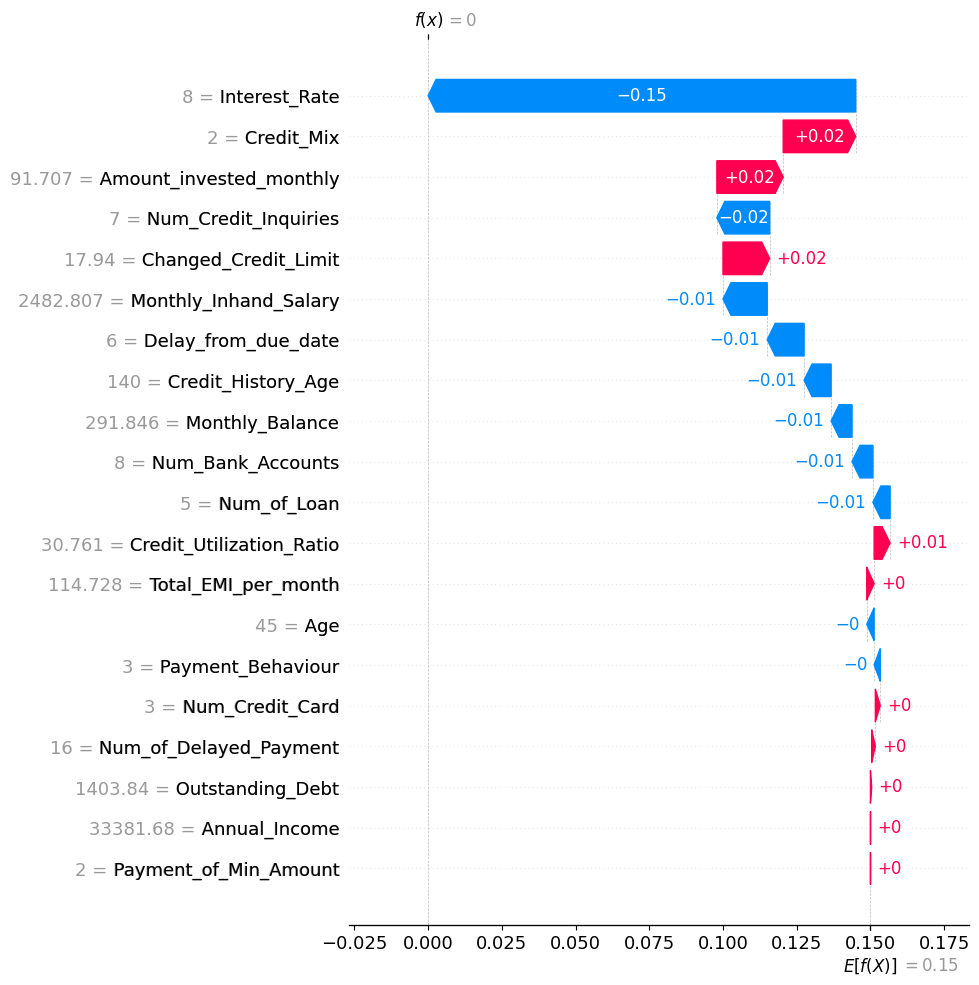

Waterfall plot for instance 0, output 2


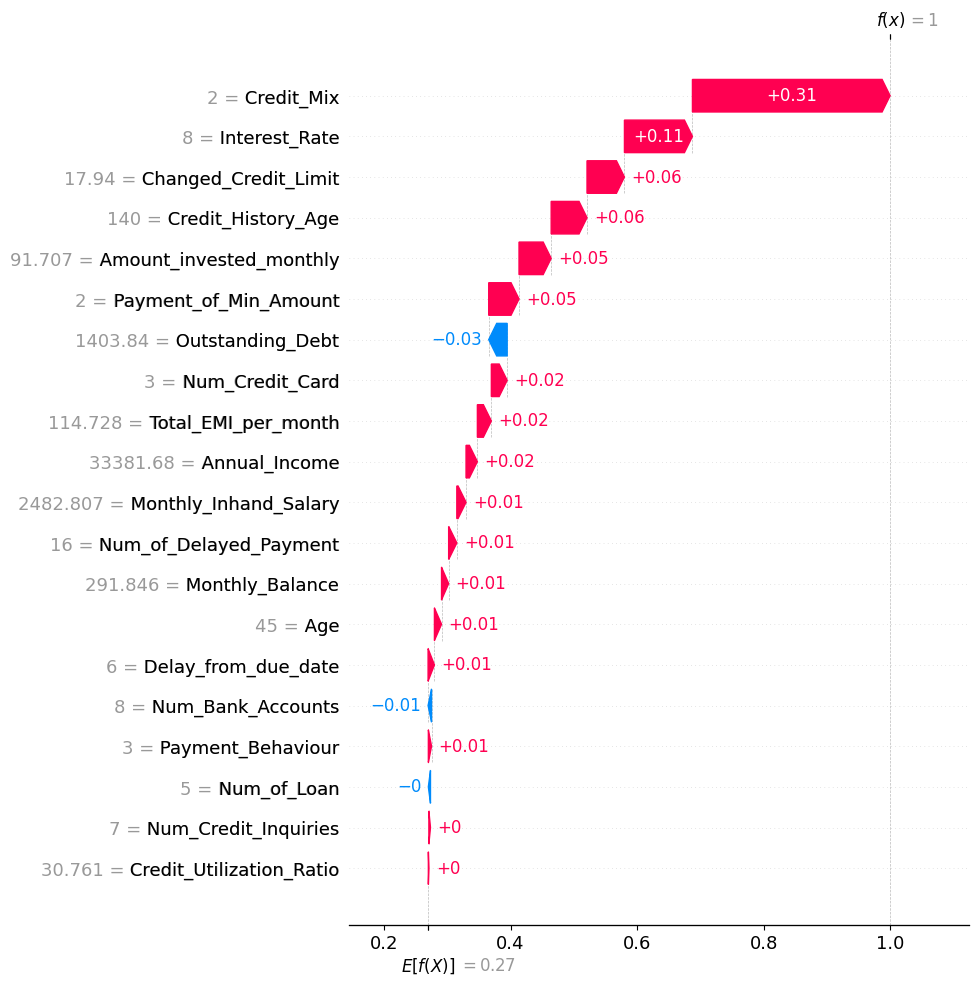

In [ ]:
for output_index in range(shap_values.shape[2]):
    print(f"Waterfall plot for instance 0, output {output_index}")
    shap.plots.waterfall(shap_values[0][:, output_index],max_display=20)

In [ ]:
shap.plots.waterfall(shap_values[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (20, 3)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [5]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = rf_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

Accuracy: 87.36%

Classification Report:
              precision    recall  f1-score   support

           0      0.921     0.952     0.936     23553
           1      0.795     0.818     0.806      8617
           2      0.843     0.787     0.814     15818

    accuracy                          0.874     47988
   macro avg      0.853     0.852     0.852     47988
weighted avg      0.873     0.874     0.873     47988



In [6]:
# Fits the explainer
import shap
explainer = shap.Explainer(rf_model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 47989it [10:09:14,  1.31it/s]


Waterfall plot for instance 0, output 0


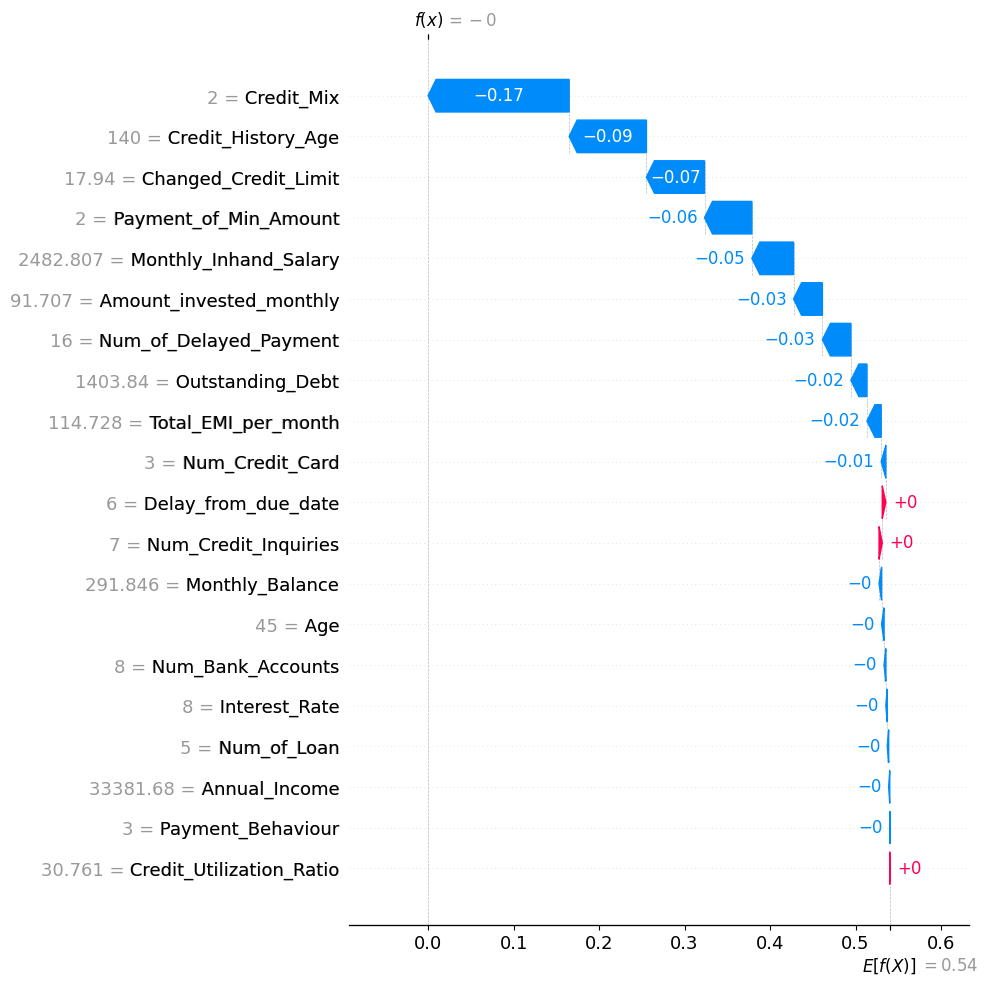

Waterfall plot for instance 0, output 1


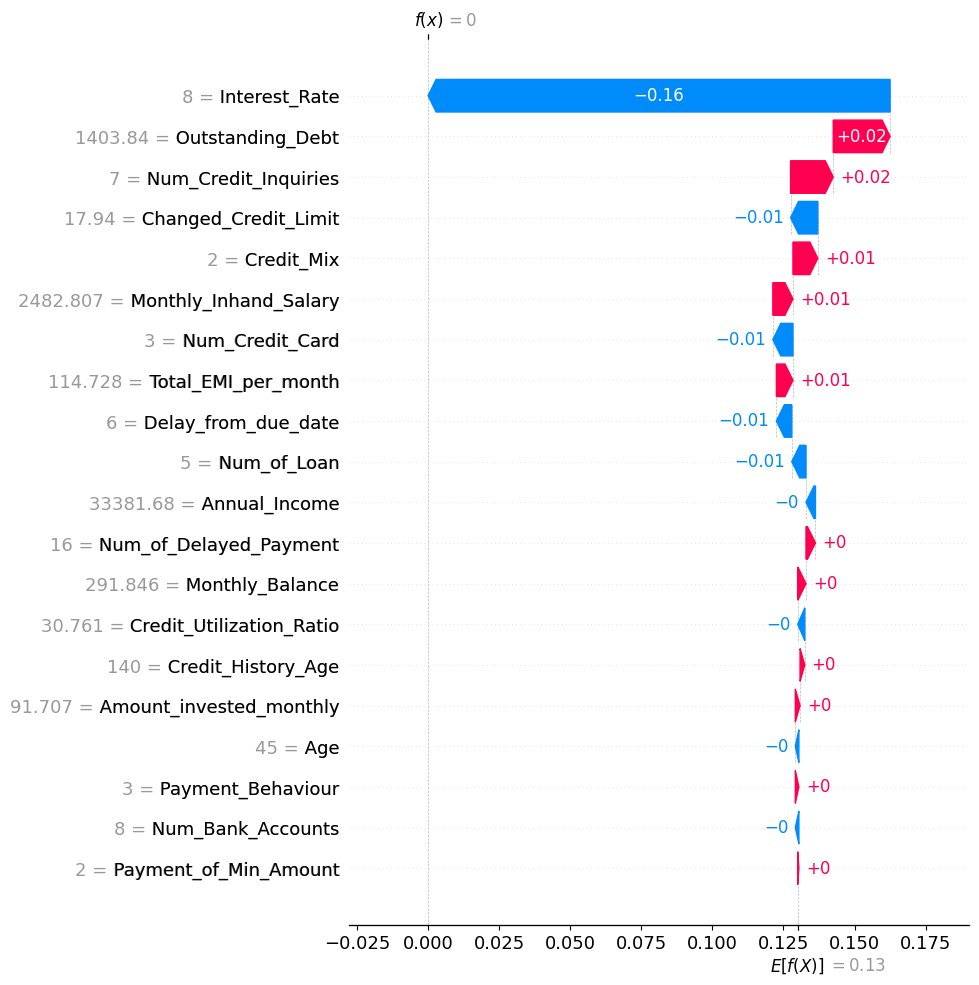

Waterfall plot for instance 0, output 2


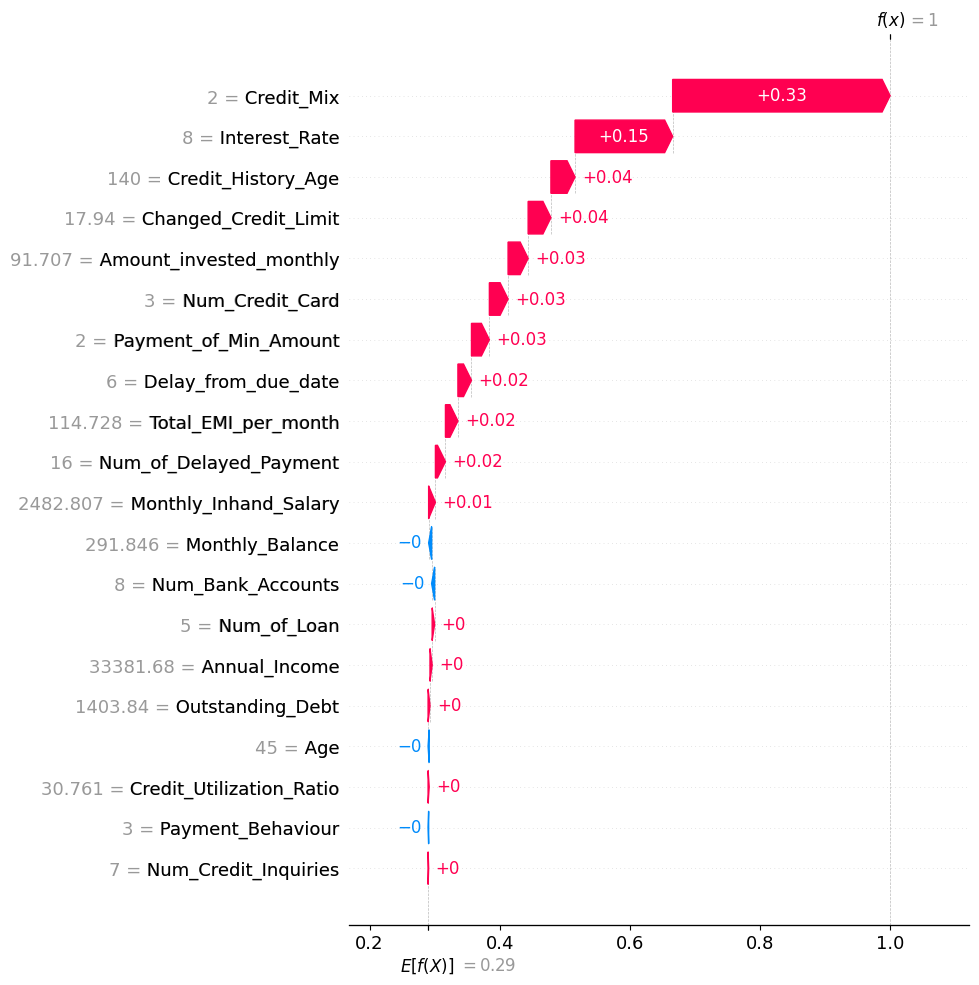

In [7]:
for output_index in range(shap_values.shape[2]):
    print(f"Waterfall plot for instance 0, output {output_index}")
    shap.plots.waterfall(shap_values[0][:, output_index],max_display=20)

In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LightGBM classifier
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6, objective='multiclass')

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = lgbm_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = lgbm_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 111972, number of used features: 20
[LightGBM] [Info] Start training from score -0.724277
[LightGBM] [Info] Start training from score -1.704137
[LightGBM] [Info] Start training from score -1.098425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,digits=3))

Accuracy: 83.88%

Classification Report:
              precision    recall  f1-score   support

           0      0.926     0.929     0.928     23553
           1      0.737     0.733     0.735      8617
           2      0.763     0.762     0.763     15818

    accuracy                          0.839     47988
   macro avg      0.809     0.808     0.808     47988
weighted avg      0.839     0.839     0.839     47988



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) as needed

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report with 3 decimal precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 84.18%

Classification Report:
              precision    recall  f1-score   support

           0      0.919     0.921     0.920     23553
           1      0.743     0.787     0.764      8617
           2      0.782     0.754     0.768     15818

    accuracy                          0.842     47988
   macro avg      0.815     0.821     0.817     47988
weighted avg      0.842     0.842     0.842     47988



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report with 3 decimal precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 71.87%

Classification Report:
              precision    recall  f1-score   support

           0      0.857     0.829     0.843     23553
           1      0.619     0.440     0.515      8617
           2      0.586     0.706     0.640     15818

    accuracy                          0.719     47988
   macro avg      0.687     0.658     0.666     47988
weighted avg      0.725     0.719     0.717     47988



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
